# VacationPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
#from api_keys import g_key


### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
city_data=pd.read_csv('city_data.csv')

### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
locations=city_data[['Lat','Lng']]
humidity=city_data['Humidity']


In [12]:
gmaps.configure(api_key=g_key)
# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=humidity,dissipating=False, max_intensity=max(humidity),point_radius=1)

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

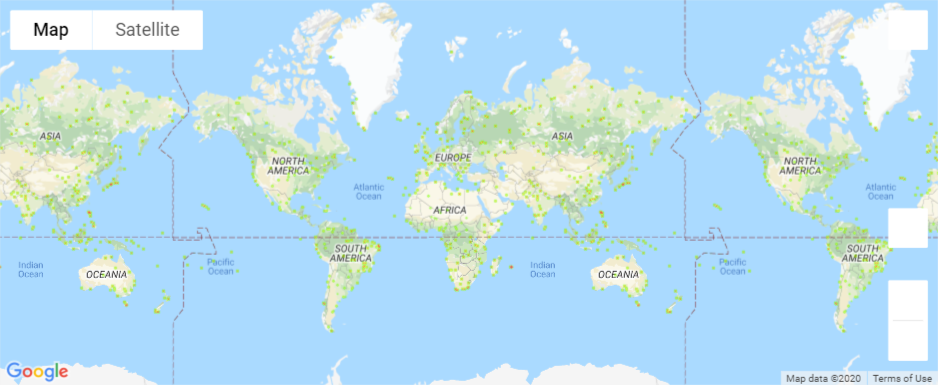

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [15]:
new_city_data=city_data.loc[city_data['Max_Temp']>=70].loc[city_data['Max_Temp']<=80].loc[city_data['Cloudiness']==0].loc[city_data['Wind_Speed']<10]
new_city_data=new_city_data.reset_index()
new_city_data=new_city_data.drop(columns={'index','Unnamed: 0'})
new_city_data

City  Cloudiness Country        Date  Humidity    Lat    Lng  \
0           tabou           0      CI  2020-01-07        84   4.42  -7.36   
1       cape town           0      ZA  2020-01-07        94 -33.93  18.42   
2      bredasdorp           0      ZA  2020-01-07        83 -34.53  20.04   
3           rocha           0      UY  2020-01-07        23 -34.48 -54.34   
4        hermanus           0      ZA  2020-01-07        89 -34.42  19.24   
5  ferkessedougou           0      CI  2020-01-07        25   9.60  -5.20   
6       batangafo           0      CF  2020-01-07        29   7.30  18.29   
7            yola           0      NG  2020-01-07        23   9.26  12.45   

   Max_Temp  Wind_Speed  
0     75.60        3.65  
1     73.99        8.05  
2     71.01        2.24  
3     77.47        9.78  
4     70.00        1.01  
5     77.07        2.66  
6     76.69        3.83  
7     79.29        8.55

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [16]:
hotel_df=[]
hotel_df=new_city_data
hotel_df['Hotel Name']=""
hotel_df

City  Cloudiness Country        Date  Humidity    Lat    Lng  \
0           tabou           0      CI  2020-01-07        84   4.42  -7.36   
1       cape town           0      ZA  2020-01-07        94 -33.93  18.42   
2      bredasdorp           0      ZA  2020-01-07        83 -34.53  20.04   
3           rocha           0      UY  2020-01-07        23 -34.48 -54.34   
4        hermanus           0      ZA  2020-01-07        89 -34.42  19.24   
5  ferkessedougou           0      CI  2020-01-07        25   9.60  -5.20   
6       batangafo           0      CF  2020-01-07        29   7.30  18.29   
7            yola           0      NG  2020-01-07        23   9.26  12.45   

   Max_Temp  Wind_Speed Hotel Name  
0     75.60        3.65             
1     73.99        8.05             
2     71.01        2.24             
3     77.47        9.78             
4     70.00        1.01             
5     77.07        2.66             
6     76.69        3.83             
7     79.29        8.55

In [17]:
# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in hotel_df.iterrows():
    
    lat=str(row['Lat'])
    lng=str(row['Lng'])
    target_coordinates = f'{lat},{lng}'
    target_search = "Hotel"
    target_radius = 5000
    target_type = "hotel"

    # set up a parameters dictionary
    params = {
        "location": target_coordinates,
        "keyword": target_search,
        "radius": target_radius,
        "type": target_type,
        "key": g_key
    }

    # run a request using params dictionary
    response = requests.get(base_url, params=params).json()
    results=response['results']
    try:
        hotel_df.loc[index, 'Hotel Name']=results[0]['name']
    except IndexError:
        hotel_df.loc[index, 'Hotel Name']="None"

In [18]:
no_hotel=hotel_df[hotel_df['Hotel Name']=='None'].index
hotel_df=hotel_df.drop(no_hotel)
hotel_df

City  Cloudiness Country        Date  Humidity    Lat    Lng  \
0           tabou           0      CI  2020-01-07        84   4.42  -7.36   
1       cape town           0      ZA  2020-01-07        94 -33.93  18.42   
2      bredasdorp           0      ZA  2020-01-07        83 -34.53  20.04   
3           rocha           0      UY  2020-01-07        23 -34.48 -54.34   
4        hermanus           0      ZA  2020-01-07        89 -34.42  19.24   
5  ferkessedougou           0      CI  2020-01-07        25   9.60  -5.20   
7            yola           0      NG  2020-01-07        23   9.26  12.45   

   Max_Temp  Wind_Speed                                Hotel Name  
0     75.60        3.65                         Hotel Les Rochers  
1     73.99        8.05  Radisson Blu Hotel Waterfront, Cape Town  
2     71.01        2.24                  Bredasdorp Country Manor  
3     77.47        9.78                              Casa Rodo 53  
4     70.00        1.01                Misty Waves Boutique Hotel  
5     77.07        2.66                            Hotel Poufiret  
7     79.29        8.55         AUN Hotel Conference Centre & Spa

In [19]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [20]:
# Add marker layer ontop of heat map

markers=gmaps.marker_layer(locations)
symbol_layer = gmaps.symbol_layer(locations, info_box_content=hotel_info)
fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig
# Display Map

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

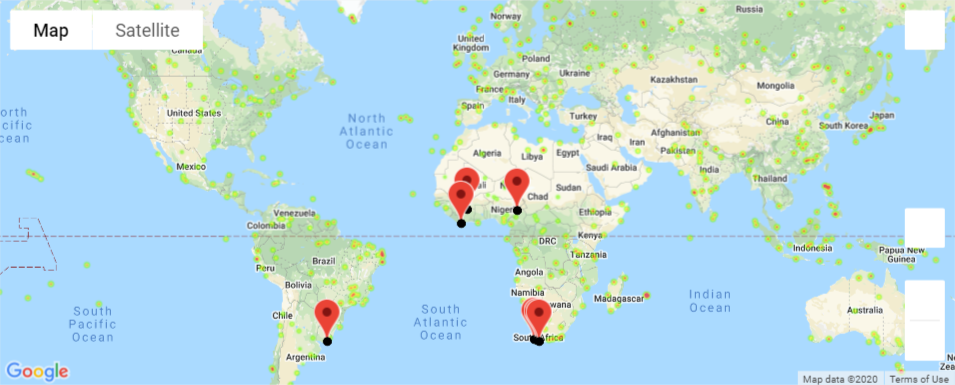